In [1]:
import tensorflow as tf
import sensor_lib.data_analis as ds
from tensorflow.data import Dataset
%cd ..

In [2]:
layer = tf.keras.layers.Activation(tf.nn.relu)
layer([-1, 0, 1, 2, 3, 4])

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 0, 1, 2, 3, 4])>

In [3]:
tf.nn.relu([-1, 0, 1, 2, 3, 4])

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 0, 1, 2, 3, 4])>

In [8]:
alf = 1
f = lambda x: tf.math.sin(
        alf * tf.math.minimum(tf.math.square(x), tf.math.square(np.pi / 2)))

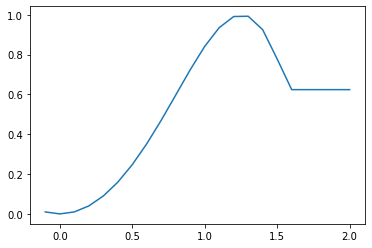

In [22]:
data = np.linspace(-0.1, 2, 22, dtype='float32')
plt.plot(data, f(tf.convert_to_tensor(data)).numpy())

In [20]:
f(np.array([10.0, 1231, 123], dtype=np.float32))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.62426585, 0.62426585, 0.62426585], dtype=float32)>

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [10]:
pressure1 = np.sin(np.linspace(0, 20, 100))[:, np.newaxis]*np.cos(np.linspace(0, 0, 100))
pressure2 = np.sin(np.linspace(0, 30, 100))[:, np.newaxis]*np.sin(np.linspace(0, 500, 100))
pressure3 = np.sin(np.linspace(0, 20, 100))[:, np.newaxis]*np.sin(np.linspace(0, 20, 100))
test_input = torch.from_numpy(np.array([pressure1, pressure2, pressure3]))

In [3]:
plt.imshow(test_input[2])

NameError: name 'plt' is not defined

In [11]:
input = test_input.to('cuda')
device = 'cuda'
input.shape

torch.Size([3, 100, 100])

In [7]:
derivative_kernel = torch.from_numpy(np.expand_dims([1, -2, 1], (0, 1, 3)).astype(np.float32))
derivative_kernel.shape

torch.Size([1, 1, 3, 1])

In [57]:
derivative_kernel = derivative_kernel.tile((input.shape[-3], 1, 1, 1))
derivative_kernel.shape

torch.Size([3, 1, 3, 1])

In [58]:
F.conv2d(input, derivative_kernel)

RuntimeError: Given groups=1, weight of size [3, 1, 3, 1], expected input[1, 3, 100, 100] to have 1 channels, but got 3 channels instead

In [59]:
# np.array([[1, -2, 1]]).transpose()[:, :, tf.newaxis, tf.newaxis].shape

In [13]:
def second_derivative(input):
    derivative_kernel = torch.from_numpy(np.expand_dims([1, -2, 1], (0, 1, 3)).astype(np.float64)).to(device)
    return F.conv2d(input, derivative_kernel)


In [61]:
test_input.shape

torch.Size([3, 100, 100])

In [15]:
res = s.sum_fiber_losses(input)

RuntimeError: Given groups=1, weight of size [1, 1, 3, 1], expected input[1, 3, 100, 100] to have 1 channels, but got 3 channels instead

In [63]:
F.conv2d(input, derivative_kernel, stride=[1], padding='valid')

RuntimeError: Given groups=1, weight of size [3, 1, 3, 1], expected input[1, 3, 100, 100] to have 1 channels, but got 3 channels instead

In [64]:
inputs = torch.randn(1, 100, 100)
filters = torch.randn(1, 1, 3, 1)
F.conv2d(inputs, filters).shape

torch.Size([1, 98, 100])

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(input[2, 0])
plt.subplot(1, 2, 2)
plt.imshow(res[2, 0])

In [66]:
(np.pi/2)**2

2.4674011002723395

In [69]:
def loss_fun(input, alf):
    return tf.keras.layers.Activation(lambda x: tf.math.sin(
        alf * tf.math.minimum(tf.math.square(x), tf.math.square(np.pi / 2))))(
            input)

alpha = 1

def trans_fun(input):
    return 1 - torch.sin(alpha*torch.minimum(torch.square(input), torch.Tensor([2.467401]).to(device)))

In [22]:
trans_fun(res.to(device)).shape

torch.Size([3, 1, 98, 100])

In [9]:
def sum_fiber_losses(input):
    return 1 - torch.prod(trans_fun(input), dim=-2)

In [73]:
signal = sum_fiber_losses(res)

TypeError: square(): argument 'input' (position 1) must be Tensor, not tensorflow.python.framework.ops.EagerTensor

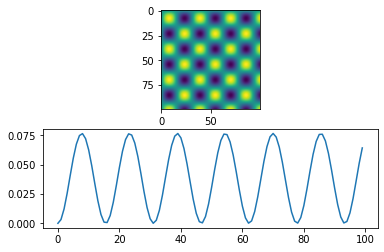

In [39]:
i = 2
plt.subplot(2, 1, 1)
plt.imshow(input.cpu()[i, 0])
plt.subplot(2, 1, 2)
signal.cpu()
plt.plot(signal.cpu()[i, 0])


In [15]:
from torchvision.transforms.functional import rotate as torch_rotate
from torchvision.transforms import InterpolationMode 

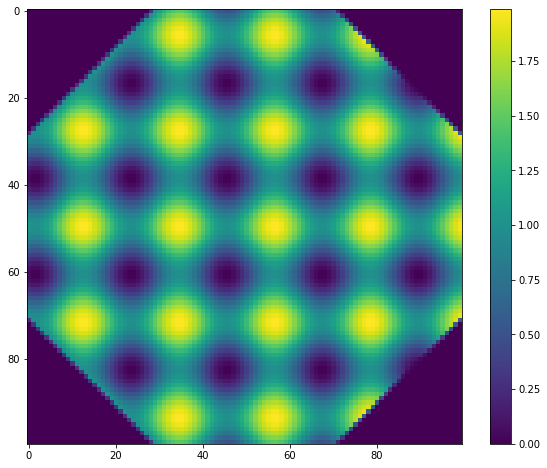

In [64]:
plt.figure(figsize=(10, 8))
plt.imshow(torch_rotate(input+1, 45, interpolation=InterpolationMode.BILINEAR).cpu()[2, 0])
plt.colorbar()

In [9]:
n_angles = 4

def rotate(input):
    return torch.concat( [torch_rotate(input.unsqueeze(1), 360/n_angles*i) for i in range(n_angles)], dim=1)

# rotated_mats = rotated(input)
# rotated_mats[0].shape

In [12]:
input = input.squeeze(1)
input.shape

torch.Size([3, 100, 100])

In [79]:
# input.squeeze_(0)
input.shape

torch.Size([3, 100, 100])

In [20]:
res = rotate(input)
res = res.reshape(-1, 1, 100, 100)
res.shape

torch.Size([12, 1, 100, 100])

In [31]:
derivs = second_derivative(res).reshape(3, 4, 98, 100)
derivs.shape

torch.Size([3, 4, 98, 100])

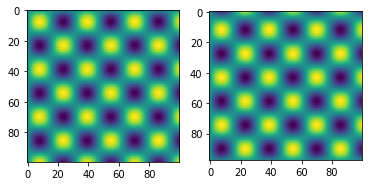

In [37]:
plt.subplot(1, 2, 1)
plt.imshow(input.cpu()[2])
plt.subplot(1, 2, 2)
plt.imshow(derivs.cpu()[2, 1])

In [83]:
loss_tensor = sum_fiber_losses(rotate(input))
loss_tensor.shape

torch.Size([3, 4, 100])

In [89]:
std = 0.01
delt = 0.01
signal = torch.normal(torch.normal(1, std, loss_tensor.shape).to(device) * loss_tensor, delt)
signal.shape

torch.Size([3, 4, 100])

In [ ]:
torch.Tensor([1, 2, 3, 4, 5])*torch.normal(1, std, (3, 2))

In [ ]:
torch.Tensor([1, 2, 3, 4, 5])*torch.normal(, torch.)

In [86]:
torch.normal(1, std, (3, 2))

tensor([[0.9985, 0.9979],
        [1.0048, 0.9913],
        [0.9945, 0.9928]])

In [1]:
import torch_sensor_lib as tsl
import torch
import yaml
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [2]:
simulator = tsl.FiberSimulator(config, device='cuda')
s = simulator

In [3]:
pressure1 = np.sin(np.linspace(0, 20, 100))[:, np.newaxis]*np.cos(np.linspace(0, 0, 100))
pressure2 = np.sin(np.linspace(0, 30, 100))[:, np.newaxis]*np.sin(np.linspace(0, 500, 100))
pressure3 = np.sin(np.linspace(0, 20, 100))[:, np.newaxis]*np.sin(np.linspace(0, 20, 100))
test_input = torch.from_numpy(np.array([pressure1, pressure2, pressure3]))
# test_input = torch.from_numpy(np.array([pressure1]))
input = test_input.to('cuda')
device = 'cuda'
input.shape

torch.Size([3, 100, 100])

In [4]:
input = np.load(r"data\pressure\pic\one_piece.npy")
input = torch.from_numpy(input).to(device)
input.shape

torch.Size([150, 64, 64])

d:\Documents\rqc_internship\RQC-Robotics-tactile_sensor\torch_sensor_lib\sim.py:74: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:744.)
  blurred_mat = F.conv2d(rot_tensor, self.gauss_kernel, padding='same')


Rot tensors


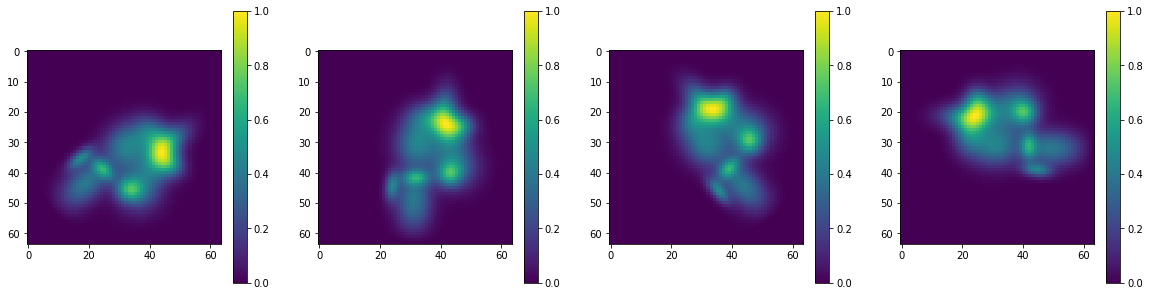

After blur


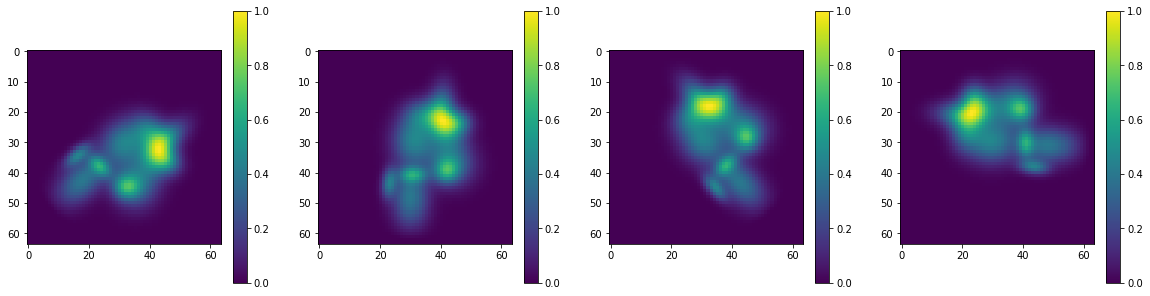

Loss in fiber


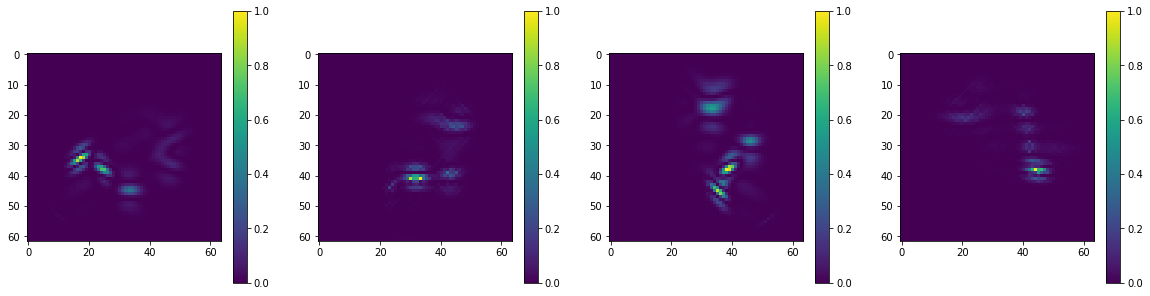

Loss sums


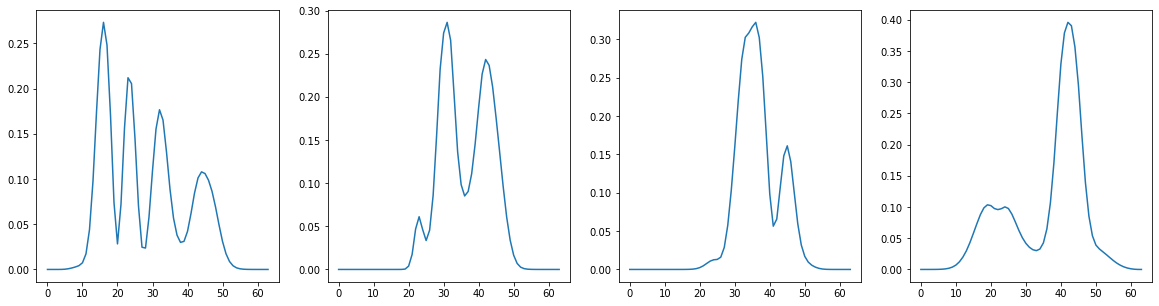

Signal


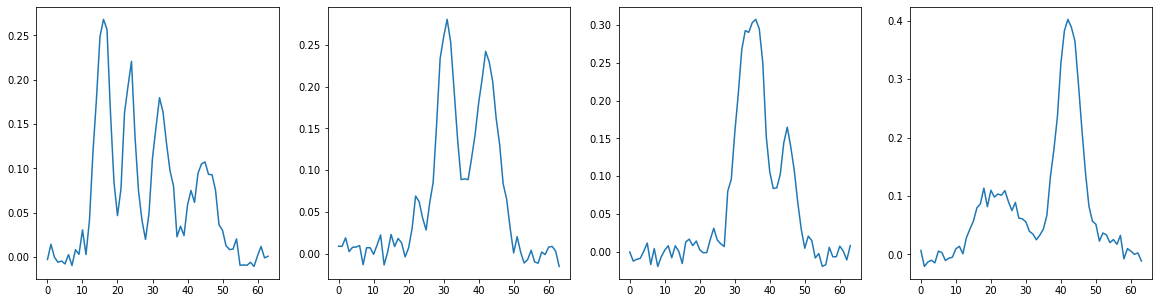

torch.Size([1, 4, 64])

In [5]:
# s.test = False
res = s.fiber_real_sim(input[2:3])
res.shape

after_fiber_rot


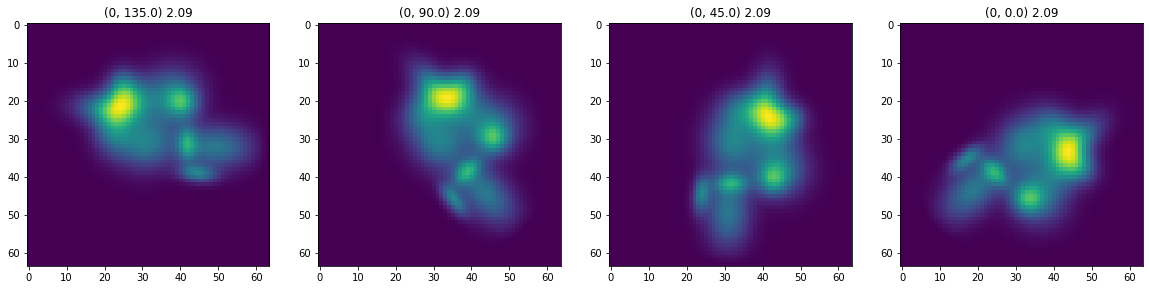

after_slise


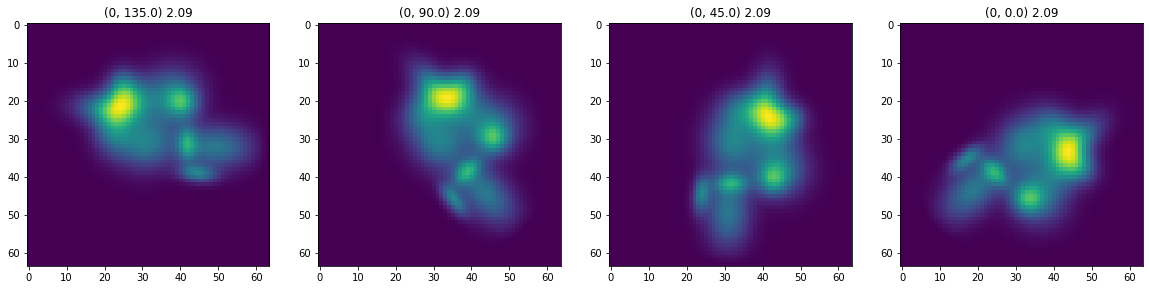

after_blur


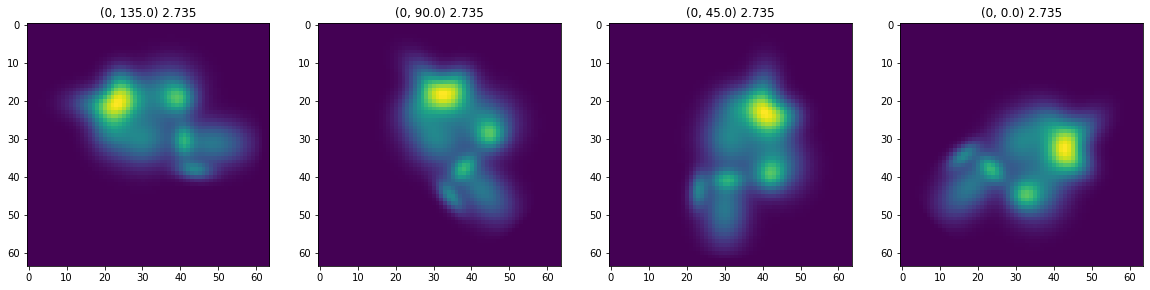

loss_fun


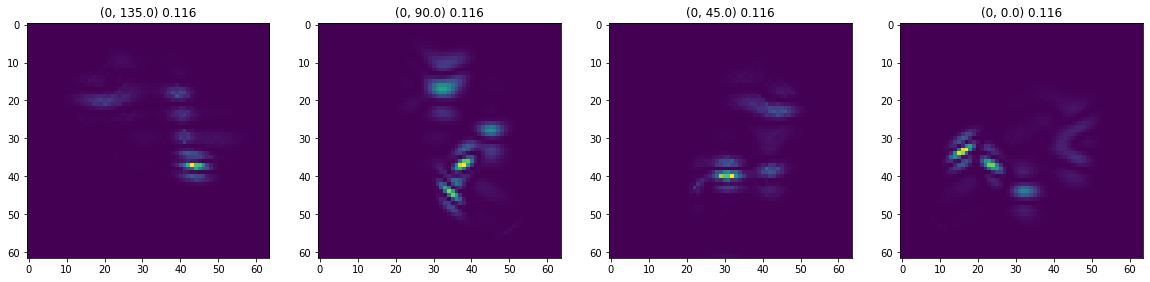

sum_loss


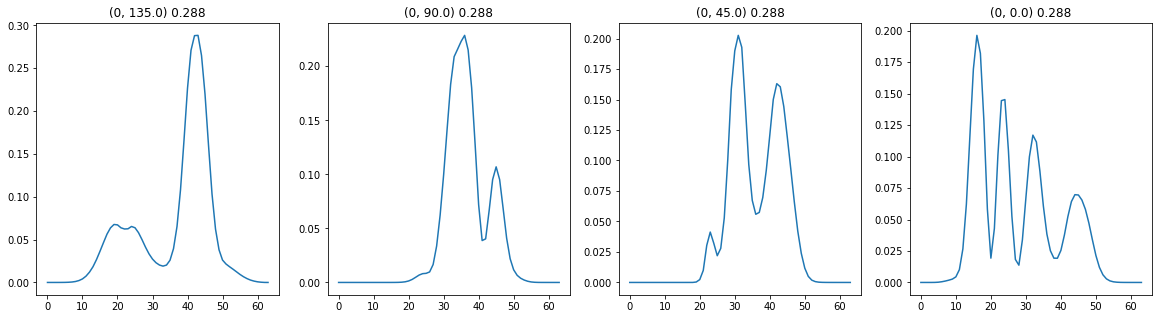

signal


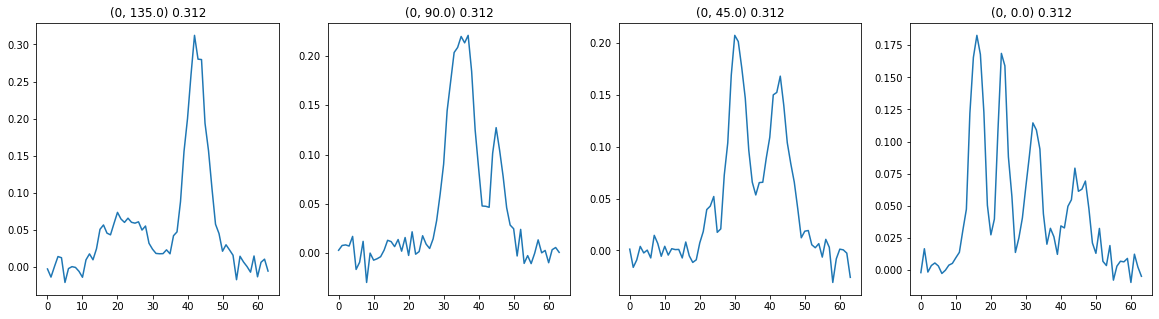

In [7]:
import sensor_lib as sl
config['sim']['test_mod'] = True
res2, _ = sl.fiber_real_sim(input.cpu().numpy()[2:3], config, 32)

In [ ]:
res2.shape

TensorShape([1, 100, 4])

In [ ]:
import matplotlib.pyplot as plt

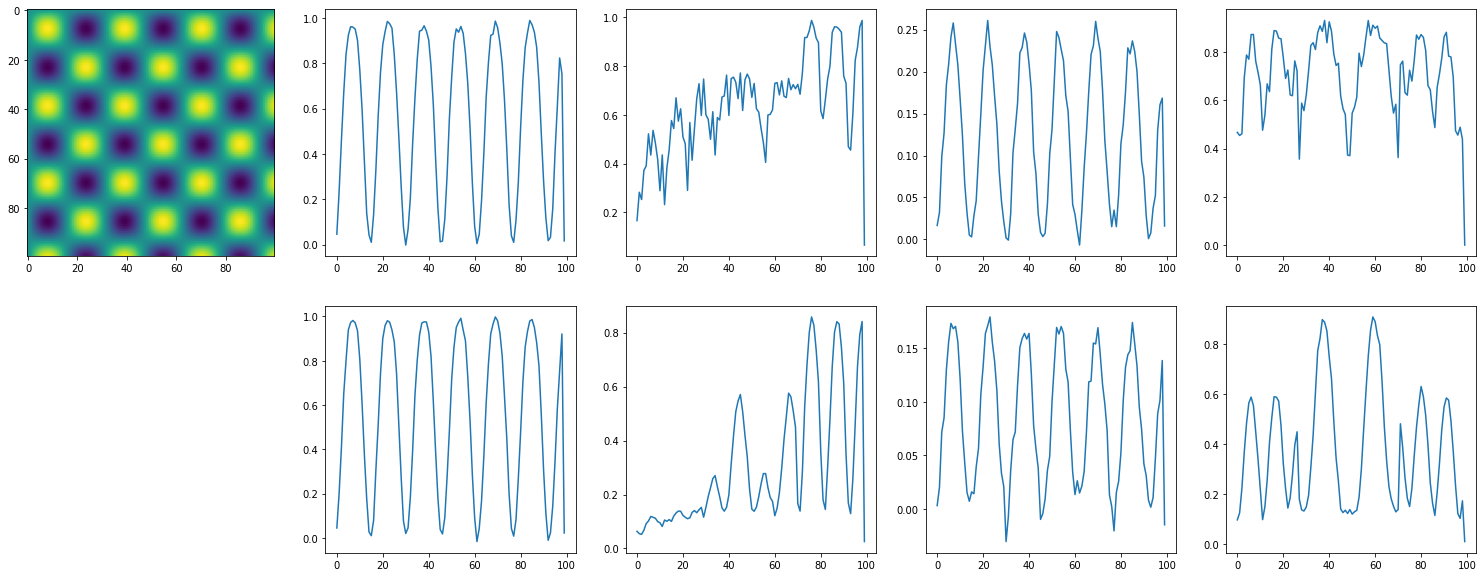

In [ ]:
i = 2
plt.figure(figsize=(26, 10))
plt.subplot(2, 5, 1)
plt.imshow(input[i].cpu())
plt.subplot(2, 5, 2)
plt.plot(res[i][0].cpu())
plt.subplot(2, 5, 3)
plt.plot(res[i][1].cpu())
plt.subplot(2, 5, 4)
plt.plot(res[i][2].cpu())
plt.subplot(2, 5, 5)
plt.plot(res[i][3].cpu())

plt.subplot(2, 5, 2+5)
plt.plot(res2[i, :, 0])
plt.subplot(2, 5, 3+5)
plt.plot(res2[i, :, 1])
plt.subplot(2, 5, 4+5)
plt.plot(res2[i, :, 2])
plt.subplot(2, 5, 5+5)
plt.plot(res2[i, :, 3])



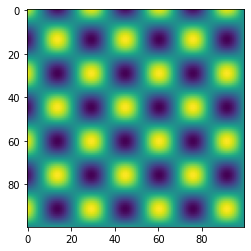

In [ ]:
# s.second_derivative(
plt.imshow(s.rotate(input)[10, 0].cpu())